<a href="https://colab.research.google.com/github/HadiRezaei1991/assignment/blob/main/dual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

def extract_frames(input_video, output_directory, frame_indices):
    # Open the video file
    cap = cv2.VideoCapture(input_video)
    if not cap.isOpened():
        print("Error: Unable to open video file")
        return

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Create the output directory if it doesn't exist
    import os
    os.makedirs(output_directory, exist_ok=True)

    # Read and save frames at specified indices
    current_frame_index = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if current_frame_index in frame_indices:
            output_path = os.path.join(output_directory, f"frame_{current_frame_index}.jpg")
            cv2.imwrite(output_path, frame)
            print(f"Frame {current_frame_index} saved as {output_path}")

        current_frame_index += 1

    cap.release()

# Example usage:
input_video = '/content/DualcarriagewayAndTown - Trim.mp4'  # Path to your output video
output_directory = '/content/output_frames'  # Output directory to save frames
frame_indices = [600]  # Indices of frames to extract

extract_frames(input_video, output_directory, frame_indices)

Frame 600 saved as /content/output_frames/frame_600.jpg


(550, 978, 3)


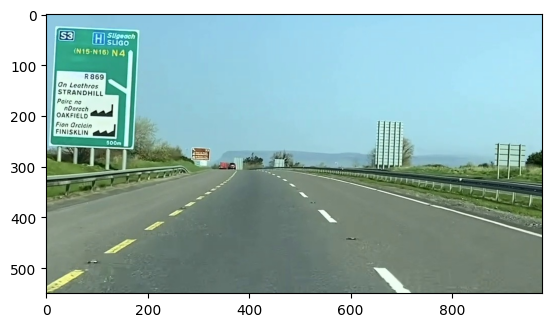

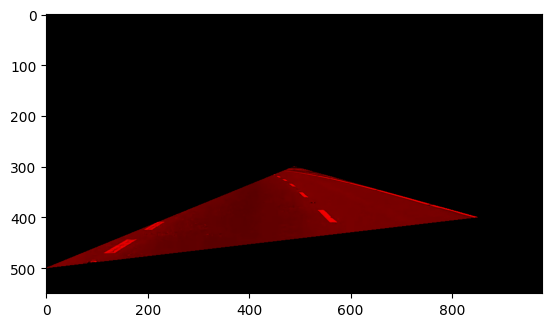

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np




# Read the image
image = cv2.imread('/content/output_frames/frame_600.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height=image.shape[0]
width=image.shape[1]

region_of_interest_vertices = [
    (0, 500),
    (width/2, 300),
    (850, 400)
]

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
  # channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image







cropped_image = region_of_interest(image,
                np.array([region_of_interest_vertices], np.int32),)


plt.imshow(image)
plt.show()


plt.imshow(cropped_image)
plt.show()

(550, 978, 3)


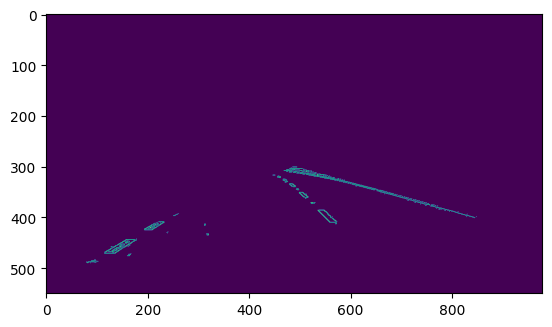

In [3]:
import matplotlib.pylab as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



# Read the image
image = cv2.imread('/content/output_frames/frame_600.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height=image.shape[0]
width=image.shape[1]

region_of_interest_vertices = [
    (0, 500),
    (width/2, 300),
    (850, 400)
]


def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
  # channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image





gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 120)


cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)

lines = cv2.HoughLinesP(cropped_image,
                        rho=2,
                        theta=np.pi/180,
                        threshold=100,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=100)
#image_with_lines = drow_the_lines(image, lines)



plt.imshow(cropped_image)
plt.show()

(550, 978, 3)


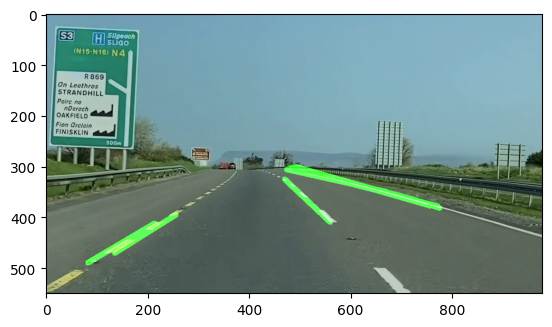

In [4]:
import matplotlib.pylab as plt
import cv2
import numpy as np

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

image = cv2.imread('/content/output_frames/frame_600.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]
region_of_interest_vertices = [
    (0, 500),
    (width/2, 300),
    (850, 400)
]

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)
lines = cv2.HoughLinesP(cropped_image,
                        rho=1,
                        theta=np.pi/100,
                        threshold=50,
                        lines=np.array([]),
                        minLineLength=10,
                        maxLineGap=100)
image_with_lines = drow_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

def process(image):
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
    (0, 500),
    (width/2, 300),
    (width, 400)
]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 120)
    cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))
    lines = cv2.HoughLinesP(cropped_image,
                            rho=2,
                            theta=np.pi/180,
                            threshold=50,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=100)
    image_with_lines = draw_the_lines(image, lines)
    return image_with_lines

cap = cv2.VideoCapture('/content/DualcarriagewayAndTown - Trim.mp4')
output_path = '/content/processed_video4.avi'

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Process and write the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    processed_frame = process(frame)
    out.write(processed_frame)

cap.release()
out.release()

# Display the processed video in the Colab sidebar
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>